# <center>STUDENT AT INSTITUT POLYTECHNIQUE DE PARIS 24 MAY 2020</center>#
# <center>PROHACK/International Data Science Hackathon</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [1]:
import csv
import marshal
import numpy as np
import pandas as pd
from math import sqrt
import networkx as nwx
import tensorflow as tf
from sklearn import svm
from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

## I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [2]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## TO USE THIS FUNCTION TO SAVE THE TARGET RESULT

1-- This function take a list of of value(liste_to_save) and the string(file_name) and create a file named "file_name.csv" containing our values

In [3]:
#this function allow to save a list data in a csv file
def save_liste(liste_to_save,file_name):    
    size_liste=len(liste_to_save)
    file_name=file_name+".csv"
    
    with open(file_name, "w") as f_write:
        writer = csv.writer(f_write, delimiter=",")
        writer.writerow(("index","pred","opt_pred"))

        for i in range(size_liste):
            writer.writerow((i+1,float(liste_to_save[i][0]),float((liste_to_save[i][1]))))

## IMPORTING DATA 

In [4]:
#load the data
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

## TO SEE THE CHARACTERISTICS OF TRAINING AND TESTING DATAS

1- Here we display a summary of the characteristics of our data

In [5]:
#to see the size of the datas
print("training data size    = ",train_data.shape)
print("testing data size     = ",test_data.shape)

training data size    =  (3865, 80)
testing data size     =  (890, 79)


In [6]:
#see the type of each training data
print(train_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [7]:
#see the type of each testing data(bormaly it is the same with training)
print(test_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [8]:
#to see the statistique of the training data
print(train_data.describe(include="all"))

        galactic year        galaxy  existence expectancy index  \
count    3.865000e+03          3865                 3864.000000   
unique            NaN           181                         NaN   
top               NaN  Tucana Dwarf                         NaN   
freq              NaN            26                         NaN   
mean     1.000709e+06           NaN                    0.872479   
std      6.945463e+03           NaN                    0.162367   
min      9.900250e+05           NaN                    0.227890   
25%      9.950060e+05           NaN                    0.763027   
50%      1.000000e+06           NaN                    0.907359   
75%      1.006009e+06           NaN                    0.992760   
max      1.015056e+06           NaN                    1.246908   

        existence expectancy at birth  Gross income per capita  Income Index  \
count                     3864.000000              3837.000000   3837.000000   
unique                            N

In [9]:
#galaxy is the only qualitative variable, so we see
print(train_data.galaxy.value_counts())

Tucana Dwarf                                   26
Andromeda XXIV                                 26
Andromeda XII                                  26
Andromeda XXII[57]                             26
Andromeda XIX[60]                              26
Canes Venatici II Dwarf                        25
Leo IV Dwarf                                   25
M32 (NGC 221)                                  25
Andromeda VIII                                 25
IC 10 (UGC 192)                                25
Pisces IV (Andromeda XIV)                      25
IC 1613 (UGC 668)                              25
Andromeda XXIII                                25
Pisces II                                      25
Eridanus II                                    25
Phoenix Dwarf Galaxy (P 6830)                  25
Boötes IV                                      25
Andromeda XV                                   25
Cetus Dwarf                                    25
Triangulum Galaxy (M33)                        25


In [10]:
#Print the first lines for to see the caracteristic of training data and differents columns
print(train_data.head())

   galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                            

In [11]:
#to see the statistique of the testing data
print(test_data.describe(include="all"))

        galactic year       galaxy  existence expectancy index  \
count    8.900000e+02          890                  885.000000   
unique            NaN          172                         NaN   
top               NaN  Andromeda X                         NaN   
freq              NaN           10                         NaN   
mean     1.011498e+06          NaN                    0.923881   
std      2.881505e+03          NaN                    0.134856   
min      1.007012e+06          NaN                    0.456086   
25%      1.009020e+06          NaN                    0.834118   
50%      1.011030e+06          NaN                    0.944683   
75%      1.014049e+06          NaN                    1.022712   
max      1.016064e+06          NaN                    1.250508   

        existence expectancy at birth  Gross income per capita  Income Index  \
count                      885.000000               885.000000    885.000000   
unique                            NaN          

In [12]:
#Print the first lines for to see the caracteristic of testing data and differents columns
print(test_data.head())

   galactic year         galaxy  existence expectancy index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                

## TO DETERMINATE THE NUMBER AND THE PERCENTAGE OF THE MISSING VALUES FOR EACH COLUMNS 

1-- We use the isnull function to determine the missing values in the columns

2--We have created the list dolonne_a_supprimer which contains the list of columns to delete during preprocessing. These columns correspond to the column for which the percentage of missing data is greater than 15%

3--The column contains the data used for the training of our models

In [13]:
#we visualize the number of missing data for each column for training data
#We create a list "column_to_delete"
#we create a list "column_uses_for_the_training"
column_training_data=train_data.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(80):
    percentage=100*(train_data[train_data[column_training_data[i]].isnull()].shape[0]/train_data.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", train_data[train_data[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")
    
del column_uses_for_the_training[-1]

galactic year  =  0  =  0.0 %train
galaxy  =  0  =  0.0 %train
existence expectancy index  =  1  =  0.0258732212160414 %train
existence expectancy at birth  =  1  =  0.0258732212160414 %train
Gross income per capita  =  28  =  0.7244501940491591 %train
Income Index  =  28  =  0.7244501940491591 %train
Expected years of education (galactic years)  =  133  =  3.4411384217335055 %train
Mean years of education (galactic years)  =  363  =  9.391979301423028 %train
Intergalactic Development Index (IDI)  =  391  =  10.116429495472186 %train
Education Index  =  391  =  10.116429495472186 %train
Intergalactic Development Index (IDI), Rank  =  433  =  11.203104786545925 %train
Population using at least basic drinking-water services (%)  =  1844  =  47.71021992238034 %train
Population using at least basic sanitation services (%)  =  1850  =  47.86545924967658 %train
Gross capital formation (% of GGP)  =  2363  =  61.13842173350582 %train
Population, total (millions)  =  2594  =  67.11513583441139

In [14]:
#We can see here the percentage of missing rows in the test data on the columns that we want to keep for our analysis
column_testing_data=test_data.columns
for i in range(79):
    if((column_testing_data[i] in column_to_delete)==False ):
        print("Number of missing data ",column_testing_data[i]," = ", test_data[test_data[column_testing_data[i]].isnull()].shape[0]," = ",100*(test_data[test_data[column_testing_data[i]].isnull()].shape[0]/890),"%test")

Number of missing data  galactic year  =  0  =  0.0 %test
Number of missing data  galaxy  =  0  =  0.0 %test
Number of missing data  existence expectancy index  =  5  =  0.5617977528089888 %test
Number of missing data  existence expectancy at birth  =  5  =  0.5617977528089888 %test
Number of missing data  Gross income per capita  =  5  =  0.5617977528089888 %test
Number of missing data  Income Index  =  5  =  0.5617977528089888 %test
Number of missing data  Expected years of education (galactic years)  =  5  =  0.5617977528089888 %test
Number of missing data  Mean years of education (galactic years)  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI)  =  8  =  0.8988764044943821 %test
Number of missing data  Education Index  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI), Rank  =  10  =  1.1235955056179776 %test


# <center> PREPROCESSING DATA  </center>#

1--This function takes as argument a pandas dataframe containing our data in csv file and does the necessary preprocessing by returning an array numpy which will be used by our classification algorithms. To do this function, do the following processing.

2--No line in the dataframe is deleted: therefore the number of input lines is equal to the number of output lines

3--We remove all columns with a percentage of missing data in the training data greater than 15%.

4--We have transformed the qualitative variables galaxy into quantitative variable by encoding and after we have deleted the galaxy column

5--In the remaining columns, we replaced the missing data with the median value of the column.

6--We have transformed the panda datafram into a numpy array that our preprocessing function will return for

7--The returned numpy array will be used to train our models.

8--We must provide our processing function with a dataframe that does not include the index to predict: therefore a dataframe of 79 columns

9--At the end, we will return a numpy array with 11 columns

In [15]:
#we build the dictionnary that we will use for encoding the categoricial variable galaxy
galaxy_categoricial=train_data.galaxy.value_counts()
dictionnary_for_encoding_galaxy={}
i=0;
for cle in galaxy_categoricial.keys() :
    i=i+1
    dictionnary_for_encoding_galaxy[cle]=i

In [16]:
def Feature_Engineering_version_1(data):
    """We use this function to do the preprocessing of the datas"""
    
    #We delete all columns where the number of rows with missing data is greater than 15%
    #For this we use the list column_to_delete that we have created in
    column_data=data.columns
    nb_lines_data=data.shape[0]
    for i in range(79):
        if(column_data[i] in column_to_delete):
            del data[column_data[i]]    
    
    #We transforme the categorial variable galaxy in integer
    wassa=[]
    for i in range(nb_lines_data):
        wassa.append(dictionnary_for_encoding_galaxy[data.galaxy[i]])
    data["galaxy_encoding"]=wassa
    
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    
    #we transform the galaxy in galaxy_encoding in this list
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier

    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.median())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [17]:
def Feature_Engineering_version_2(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
        
    #Add the columns training data of preprocessing in the data
    TEST_B_0=pd.get_dummies(train_data["galactic year"])
    TEST_B_COLUMNS_0=TEST_B_0.columns
    for INDEX_1 in TEST_B_COLUMNS_0:
        data[INDEX_1]=TEST_B_0[INDEX_1]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    
    #Add the columns testing data of preprocessing in the data
    TEST_B_0=pd.get_dummies(test_data["galactic year"])
    TEST_B_COLUMNS_0=TEST_B_0.columns
    for INDEX_1 in TEST_B_COLUMNS_0:
        data[INDEX_1]=TEST_B_0[INDEX_1]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    
    TEST_B=pd.get_dummies(data["galactic year"])
    TEST_B_COLUMNS=TEST_B.columns
    for INDEX_1 in TEST_B_COLUMNS:
        data[INDEX_1]=TEST_B[INDEX_1]
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    #del data["galactic year"]
    
    #we transform the galaxy in galaxy_encoding in this list
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier

    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.median())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [18]:
def Feature_Engineering_version_3(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    #--------------------------------------------------------------------------------------------------------------
    data["Life expectancy at birth"]=data["Life expectancy at birth, male (galactic years)"]*data["Life expectancy at birth, female (galactic years)"]/2
    del data["existence expectancy at birth"]
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    del data["Current health expenditure (% of GGP)"]
    del data["Respiratory disease incidence (per 100,000 people)"]
    del data["Labour force participation rate (% ages 15 and older), female"]
    del data["Labour force participation rate (% ages 15 and older)"]
    #--------------------------------------------------------------------------------------------------------------
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier
    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.mean())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

# <center> STRATEGY OF ENERGY OPTIMIZATION </center> #

1--In here we have use à lot of technique for allocate the energy. Each function represents a one method for allocate the energy.

In [19]:
def repartition_energy_strategy_1(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index < 0 .7 and
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index > 0 .7
    max_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"].max()+0.01
    max_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"].max()+0.01
    
    sum_existence_expectancy_index_sup_0_7=(max_sup_0_7-GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"]).sum()
    sum_existence_expectancy_index_inf_0_7=(max_inf_0_7-GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"]).sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*500
    energy_for_sup_0_7=50000-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=(max_sup_0_7-data_energy["existence expectancy index"][i])*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=(max_inf_0_7-data_energy["existence expectancy index"][i])*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [20]:
def repartition_energy_strategy_2(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we calculate potential increase
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    sum_existence_expectancy_index_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["Potential for increase in the Index"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste that this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [21]:
def repartition_energy_strategy_3(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3

    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]

    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index < 0 .7 and
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index > 0 .7
    max_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["y"].max()+0.001
    max_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["y"].max()+0.001
    
    #we calculate the sum of the y
    sum_y_sup_0_7=(max_sup_0_7-GALAXY_existence_expectancy_index_SUP_0_7["y"]).sum()
    sum_y_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["y"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0

        
    #process of distribution for the galaxy who have existence expectancy index<0.7
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]<0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            #energy=data_energy["y"][i]*energy_for_inf_0_7/sum_y_inf_0_7
            if(energy>100):
                data_energy["allocation energy"][i]=min(100,energy-100)
                percentage_inf_0_7+=min(100,energy-100)
            else:
                data_energy["allocation energy"][i]=energy
                percentage_inf_0_7+=energy
        else:
            energy=(max_sup_0_7-data_energy["y"][i])*energy_for_sup_0_7/sum_y_sup_0_7
            if(energy>100):
                data_energy["allocation energy"][i]=min(100,energy-100)
                percentage_sup_0_7+=min(100,energy-100)
            else:
                data_energy["allocation energy"][i]=energy
                percentage_sup_0_7+=energy
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [22]:
def repartition_energy_strategy_4(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy. Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3

    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]

    #we axtract the index in decreasing order of y for data with existence expectancy index>0.7 and existence 
    #expectancy index<0.7
    index_sort_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7.sort_values(["y"],ascending=[True])["y"].index
    index_sort_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_inf_0_7=percentage*500
    energy_for_sup_0_7=50000-energy_for_inf_0_7-200
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    # give the inf 0.7
    number_inf=energy_for_inf_0_7//100
    for i in index_sort_inf_0_7[:number_inf]:
        data_energy["allocation energy"][i]=100
        percentage_inf_0_7+=data_energy["allocation energy"][i]
    if(index_sort_inf_0_7.shape[0]>number_inf):
        for i in index_sort_inf_0_7[number_inf:]:
            data_energy["allocation energy"][i]=100/(index_sort_inf_0_7.shape[0]-number_inf)
            percentage_inf_0_7+=data_energy["allocation energy"][i]

    # give the sup 0.7
    number_sup=energy_for_sup_0_7//100
    for i in index_sort_sup_0_7[:number_sup]:
        data_energy["allocation energy"][i]=99
        percentage_sup_0_7+=data_energy["allocation energy"][i]
    if(index_sort_sup_0_7.shape[0]>number_sup):
        for i in index_sort_sup_0_7[number_sup:]:
            data_energy["allocation energy"][i]=100/(index_sort_sup_0_7.shape[0]-number_sup)
            percentage_sup_0_7+=data_energy["allocation energy"][i]
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [23]:
def repartition_energy_strategy_5(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 1  DSML energy at the start, then we distribute the remaining energy by allocating 100  DSML 
    energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a <0.7"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=49990-data_energy.shape[0]
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0+1
    
    # give the inf 0.7
    for i in index_sort_:
        if(energy_for_max>0):
            data_energy["allocation energy"][i]=100
            energy_for_max-=99
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                percentage_sup_0_7+=data_energy["allocation energy"][i]
        else:
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=1
            else:
                percentage_sup_0_7+=1
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [24]:
def repartition_energy_strategy_6(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 1  DSML energy at the start, then we distribute the remaining energy by allocating 100  DSML 
    energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a <0.7"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=49990-data_energy.shape[0]
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0+1
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in index_sort_:
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][i]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][i]=100
                energy_for_max-=99
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                data_energy["allocation energy"][i]=100
                energy_for_max-=99
                percentage_sup_0_7+=data_energy["allocation energy"][i]
        else:
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=1
            else:
                percentage_sup_0_7+=1
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [25]:
def repartition_energy_strategy_7(data_energy,percentage):
    """In this case, we will calculate the the square of Potential for increase in the Index and classify the galaxies 
    by this value. After, wo give 100DSML energy for the 400first, then we will give 50 of the 100 first following, at
    the end we give 99,98,97,...,1 at the last
    """
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    data_energy['Potential for increase in the Index square']=data_energy['Potential for increase in the Index']*data_energy['Potential for increase in the Index']
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    
    
    #we axtract the index in decreasing order of Potential for increase in the Index square
    #index_sort_=data_energy.sort_values(["Potential for increase in the Index square"],ascending=[True])["Potential for increase in the Index square"].index
    index_sort_INF_0_7=GALAXY_existence_expectancy_index_INF_0_7.sort_values(["Potential for increase in the Index square"],ascending=[False])["Potential for increase in the Index square"].index
    index_sort_SUP_0_7=GALAXY_existence_expectancy_index_SUP_0_7.sort_values(["Potential for increase in the Index square"],ascending=[False])["Potential for increase in the Index square"].index
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We give 100DSML energy of the 50 first lower existence expectancy index 
    for i in range(50):
        data_energy["allocation energy"][index_sort_INF_0_7[i]]=100
        
    #We give 100DSML energy of the 50 first lower existence expectancy index 
    for i in range(399):
        data_energy["allocation energy"][index_sort_SUP_0_7[i]]=100
                
    tampon=100
    for i in range(399,499):
        data_energy["allocation energy"][index_sort_SUP_0_7[i]]=tampon
        tampon-=1
        if(tampon==-1):
            print("------------NEGATIVE VALUE------------")
    
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]<0.7):
            percentage_inf_0_7+=data_energy["allocation energy"][i]
        else:
            percentage_sup_0_7+=data_energy["allocation energy"][i]
    
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    print("SQR ALLOCATION ENERGY==",data_energy['Potential for increase in the Index square'].sum())
        
    return data_energy["allocation energy"].values.tolist()
    
    

In [26]:
def repartition_energy_strategy_8(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in index_sort_:
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][i]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][i]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                data_energy["allocation energy"][i]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][i]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [27]:
def repartition_energy_strategy_9(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(400):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give 50 energy of the next 100
    for i in range(400,499):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=50
                energy_for_max-=50
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=50
                energy_for_max-=50
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    #we give energy of the next 100
    tamp=100
    for i in range(499,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [28]:
def repartition_energy_strategy_10(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(400):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give energy of the next 100
    tamp=100
    for i in range(400,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1-(i%2)
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1-(i%2)
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [29]:
def repartition_energy_strategy_11(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(300):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give energy of the next 100
    tamp=100
    for i in range(300,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

# <center> Uses this function for to have statistique in our prediction </center> #

In [30]:
def optimization_energey_statistique(prediction_liste):
    """This function calculate the potential for increase in the index, the Likely increase in the index, the total
    energy and the total index"""
    
    size_list=len(prediction_liste)
    Potential_for_increase_in_the_Index=0.0
    Likely_increase_in_the_Index=0.0
    total_index=0.0
    
    for i in range(size_list):
        Potential_for_increase_in_the_Index+= -np.log(prediction_liste[i][0]+0.01)+3
        Likely_increase_in_the_Index+=prediction_liste[i][1]*(-np.log(prediction_liste[i][0]+0.01)+3)*(-np.log(prediction_liste[i][0]+0.01)+3)/1000
        total_index+=prediction_liste[i][0]
        
    return Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index

# <center> Prediction Error Visualization Tools </center> #

In [98]:
def graphe_error_visualization(Y_node_test_preprocessing,prediction_):
    """This function allow us to see the difference between of the real target y and the prediction"""
    
    Y1=Y_node_test_preprocessing
    Y2=prediction_
    size_list=len(Y_node_test_preprocessing)
    X=np.arange(0, size_list)
    
    plt.figure(figsize=(40,15))
    plt.plot(X, Y2, 'b', label="prediction")
    plt.plot(X, Y1, 'r', label="Y_node_test_preprocessing")
    plt.legend(loc='best', fontsize=8)
    plt.xlabel('NUMBER OF PARAMETERS')
    plt.title('GRAPH')
    plt.show()
    
    plt.figure(figsize=(40,15))
    plt.plot(X, Y1, 'r', label="Y_node_test_preprocessing")
    plt.plot(X, Y2, 'b', label="prediction")
    plt.legend(loc='best', fontsize=8)
    plt.xlabel('NUMBER OF PARAMETERS')
    plt.title('GRAPH')
    plt.show()

# <center> Error Analysis Function </center> #

In [99]:
def error_change(Y_node_test_preprocessing,prediction_,rate):
    """this function displays the targets that present a prediction error greater than rate and make the 
    correction. After that, the function displays the RMSE before processing by the function and the RMSE after 
    processing"""
    
    rmse1=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    Y_node_test_preprocessing_values=np.array(Y_node_test_preprocessing.values)
    prediction_value=np.array(prediction_)
    
    for i in range(len(Y_node_test_preprocessing_values)):
    
        if(Y_node_test_preprocessing_values[i]-prediction_value[i]>rate):
            print("Y_node_test_preprocessing[",i,"]=",Y_node_test_preprocessing_values[i],"    prediction_value[",i,"]=",prediction_value[i]," error=",Y_node_test_preprocessing_values[i]-prediction_value[i])
            prediction_value[i]+=Y_node_test_preprocessing_values[i]-prediction_value[i]
    
        if(prediction_value[i]-Y_node_test_preprocessing_values[i]>rate):
            print("Y_node_test_preprocessing[",i,"]=",Y_node_test_preprocessing_values[i],"    prediction_value[",i,"]=",prediction_value[i]," error=",prediction_value[i]-Y_node_test_preprocessing_values[i])
            Y_node_test_preprocessing_values[i]+=prediction_value[i]-Y_node_test_preprocessing_values[i]
    
    rmse2=sqrt(mean_squared_error(Y_node_test_preprocessing_values,prediction_value))
    
    print("FIRST ERROR=",rmse1,"   SECOND ERROR=",rmse2)

# <center> PREDICTION ALGORITHM </center> #

# 1-- we have implemented several classification algorithms. The goal is to determine which is the best algorithm.
# 2-- For each algorithm, we determined the execution time and we built a graph which gives the precision graph as a function of the number of parameters
# 3-- To train our prediction algorithms, we split the data into 2 parts: 70% for training the data and 30% for testing the data.


# GRADIENT BOOSTING REGRESSOR #


In [150]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_BaggingRegressor=[]
parameter_BaggingRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_BaggingRegressor.append(i+1)
    bagging_regressor = GradientBoostingRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the bagging model
    bagging_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)

    #predictor and calcul rms
    prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_BaggingRegressor.append(rmse)
timer(start_time)


Time taken: 0 hours 2 minutes and 39.56 seconds.


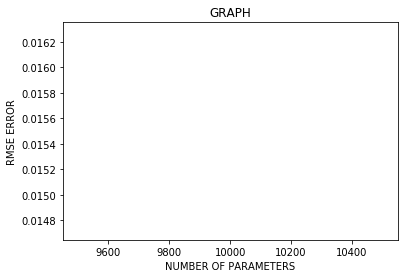

MIN ERROR RMSE== 0.015500878442443708     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [151]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(accuracy_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [ ]:
#visualisation error
graphe_error_visualization(Y_node_test_preprocessing,prediction_)

In [156]:
#analyze the error
error_change(Y_node_test_preprocessing,prediction_,0.04)

MIN ERROR RMSE== 0.020920659887323532     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
MIN ERROR RMSE== 0.020967149332005625     OBTAIN WITH learning_rate== 0.02      and n_estimators== 500001
MIN ERROR RMSE== 0.020858002041096474     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001 
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.02079566695403087     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.020557447070987417     OBTAIN WITH learning_rate== 0.09      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.020528025813641004     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1


In [133]:
def Feature_Engineering_version_4(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    #--------------------------------------------------------------------------------------------------------------
    data["Life expectancy at birth"]=data["Life expectancy at birth, male (galactic years)"]*data["Life expectancy at birth, female (galactic years)"]/2
    del data["existence expectancy at birth"]
    ###############################################################################################################
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #data["existence expectancy"]=data["existence expectancy index"]*data["existence expectancy at birth"]
    #data["Intergalactic Development Index (IDI) Rank"]=data["Intergalactic Development Index (IDI), female, Rank"]*data["Intergalactic Development Index (IDI), male, Rank"]/2
    #data["Intergalactic Development Index (IDI)"]=data["Intergalactic Development Index (IDI), female"]*data["Intergalactic Development Index (IDI), male"]/2
    #data["Estimated gross galactic income per capita"]=data["Estimated gross galactic income per capita, male"]*data["Estimated gross galactic income per capita, female"]/2
    #data["Expected years of education"]=data["Expected years of education, female (galactic years)"]*data["Expected years of education, male (galactic years)"]/2
    #data["Mean years of education"]=data["Mean years of education, female (galactic years)"]*data["Mean years of education, male (galactic years)"]/2
    #data["Youth unemployment"]=data["Youth unemployment rate (female to male ratio)"]*data["Mortality rate, female grown up (per 1,000 people)"]
    #data["123 456 789"]=data["Population with at least some secondary education (% ages 25 and older)"]*data["Population, total (millions)"]
    #data["123 456 789"]=data["galactic year"]*data["Exports and imports (% of GGP)"]
    data["random"]=data["Labour force participation rate (% ages 15 and older), female"]*data["Mortality rate, male grown up (per 1,000 people)"]/2
    #data["random1"]=data["Labour force participation rate (% ages 15 and older)"]*data["Mortality rate, female grown up (per 1,000 people)"]/2
    data["random123456"]=data["Labour force participation rate (% ages 15 and older), female"]
    #data["Labour force participatio"]=data["Labour force participation rate (% ages 15 and older)"]*data["Labour force participation rate (% ages 15 and older), female"]/2
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #del data["galactic year"]
    #del data["Mortality rate, female grown up (per 1,000 people)"]
    #del data["Mortality rate, male grown up (per 1,000 people)"]
    #we transform the galaxy in galaxy_encoding in this list
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    del data["Current health expenditure (% of GGP)"]
    del data["Respiratory disease incidence (per 100,000 people)"]
    del data["Labour force participation rate (% ages 15 and older), female"]
    del data["Labour force participation rate (% ages 15 and older)"]
    #--------------------------------------------------------------------------------------------------------------
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier
    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.mean())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [ ]:
MIN ERROR RMSE== 0.01989708933947141     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001->median : 
MIN ERROR RMSE== 0.01723624213581525     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
MIN ERROR RMSE== 0.01657887536976412     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
MIN ERROR RMSE== 0.01610883821330026     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
MIN ERROR RMSE== 0.01585686397528856     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001->delete existence expectancy at birth : 

In [141]:
test_data=pd.read_csv("DATA/test.csv")
#print(np.exp(test_data["existence expectancy at birth"]))
test_data["sawadogo"]=np.exp(test_data["existence expectancy at birth"])

In [145]:
print(test_data["existence expectancy at birth"].max())

100.42765303163964


In [147]:
np.log(np.exp(101))

101.0

In [56]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]
################################################################################################################
#--------------------------------------------------------------------------------------------------------------#
#preprocessing Data
#train_data_preprocessing=Feature_Engineering_version_1train_data)
#test_data_preprocessing=Feature_Engineering_version_1(test_data)
#train_data_preprocessing=Feature_Engineering_version_2(train_data)
#test_data_preprocessing=Feature_Engineering_version_2(test_data)
train_data_preprocessing=Feature_Engineering_version_3(train_data)
test_data_preprocessing=Feature_Engineering_version_3(test_data)
#train_data_preprocessing=Feature_Engineering_version_4(train_data)
#test_data_preprocessing=Feature_Engineering_version_4(test_data)
#--------------------------------------------------------------------------------------------------------------#
################################################################################################################
#build the model
bagging_regressor = GradientBoostingRegressor(n_estimators=10001, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)

#fit the model
bagging_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)


prediction_test=bagging_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
################################################################################################################
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,10)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_7(test_data,10)
#op_pred=repartition_energy_strategy_9(test_data,10)
#op_pred=repartition_energy_strategy_10(test_data,10)
#op_pred=repartition_energy_strategy_11(test_data,10)
op_pred=repartition_energy_strategy_12(test_data,10)
#---------------------------------------------------------------------------------------------------------------
################################################################################################################
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("----------------------------------------------------------------------------------------------------------")
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"prediction_")

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.799
percentage_inf_0_7== 0.1
Total energy== 44950.0
----------------------------------------------------------------------------------------------------------
POTENTIAL FOR INCREASE ON THE INDEX  =  5029.346662953033
LIKELY INCREASE IN THE INDEX         =  1689.7530896173425
TOTAL INDEX                          =  71.13751091666992


In [70]:
prediction_test_test=np.array(prediction_test)
for i in range(len(prediction_test)):
    if(prediction_test_test[i]>0.4):
        print(prediction_test_test[i])

0.5195756756090388
0.5815595307693956
0.4448283317114444
0.41586820469764735


In [55]:
def repartition_energy_strategy_12(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(300):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give energy of the next 100
    tamp=100
    for i in range(300,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [ ]:
#op_pred=repartition_energy_strategy_5(test_data,10)
percentage_sup_0_7== 0.86788
percentage_inf_0_7== 0.132
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.288931566672
LIKELY INCREASE IN THE INDEX         =  1845.3137889820994
TOTAL INDEX                          =  72.84831390636701
#op_pred=repartition_energy_strategy_6(test_data,10)
percentage_sup_0_7== 0.89988
percentage_inf_0_7== 0.1
POTENTIAL FOR INCREASE ON THE INDEX  =  5003.845370998089
LIKELY INCREASE IN THE INDEX         =  1850.1326338520128
TOTAL INDEX                          =  73.15030614138203
#op_pred=repartition_energy_strategy_6(test_data,10)==10001
percentage_sup_0_7== 0.89988
percentage_inf_0_7== 0.1
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.822920834223
LIKELY INCREASE IN THE INDEX         =  1848.0800644412034
TOTAL INDEX                          =  73.14867232815361
#op_pred=repartition_energy_strategy_5(test_data,10)=10001
percentage_sup_0_7== 0.86788
percentage_inf_0_7== 0.132
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.548136507249
LIKELY INCREASE IN THE INDEX         =  1847.8340468262816
TOTAL INDEX                          =  73.1447088933696
#op_pred=repartition_energy_strategy_4(test_data,10)=10001
percentage_sup_0_7== 0.8890399999999755
percentage_inf_0_7== 0.102
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.44429713667
LIKELY INCREASE IN THE INDEX         =  1829.1378070213807
TOTAL INDEX                          =  73.21192033270165
#op_pred=repartition_energy_strategy_3(test_data,11)=10001
percentage_sup_0_7== 0.889821999999999
percentage_inf_0_7== 0.10997799999999998
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.940033743109
LIKELY INCREASE IN THE INDEX         =  1671.7373396603184
TOTAL INDEX                          =  73.15123132939549
#op_pred=repartition_energy_strategy_2(test_data,11)=10001
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.0952960183995
LIKELY INCREASE IN THE INDEX         =  1648.1500470471433
TOTAL INDEX                          =  73.26254196177963
#op_pred=repartition_energy_strategy_1(test_data,11)=10001
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.342979700957
LIKELY INCREASE IN THE INDEX         =  1627.1542064459184
TOTAL INDEX                          =  73.19998087350122
#op_pred=repartition_energy_strategy_8(test_data,11)=10001
percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5001.295519990818
LIKELY INCREASE IN THE INDEX         =  1850.8819608038777
TOTAL INDEX                          =  73.00876638217554
#op_pred=repartition_energy_strategy_8(test_data,11)=10001
percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5019.839939052477
LIKELY INCREASE IN THE INDEX         =  1853.7819768026716
TOTAL INDEX                          =  71.26682961595846
#op_pred=repartition_energy_strategy_8(test_data,11)=10001
percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5023.980554036348
LIKELY INCREASE IN THE INDEX         =  1861.5233870477325
TOTAL INDEX                          =  71.46667469924262

#-------------------------------------------------------------------------------------------------------------#

 ## IN HERE WE TRY TO BUILD THE GRAPHE OF LIKELY INCREASE IN FACT PARAMETOR OF MODEL USING GRADIENT BOOSTING 

In [98]:
#load data 
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]
###############################################################################################################
#--------------------------------------------------------------------------------------------------------------
#Add the columns of preprocessing in the testing data
#TEST_A_0=pd.get_dummies(train_data.galaxy)
#TEST_A_COLUMNS_0=TEST_A_0.columns
#for INDEX in TEST_A_COLUMNS_0:
#    test_data[INDEX]=TEST_A_0[INDEX]*0
    
#TEST_B_0=pd.get_dummies(train_data["galactic year"])
#TEST_B_COLUMNS_0=TEST_B_0.columns
#for INDEX_1 in TEST_B_COLUMNS_0:
#    test_data[INDEX_1]=TEST_B_0[INDEX_1]*0
##############################################################################################################
#Add the columns of preprocessing in the training data
#TEST_A_0=pd.get_dummies(test_data.galaxy)
#TEST_A_COLUMNS_0=TEST_A_0.columns
#for INDEX in TEST_A_COLUMNS_0:
#    train_data[INDEX]=TEST_A_0[INDEX]*0
    
#TEST_B_0=pd.get_dummies(test_data["galactic year"])
#TEST_B_COLUMNS_0=TEST_B_0.columns
#for INDEX_1 in TEST_B_COLUMNS_0:
#    train_data[INDEX_1]=TEST_B_0[INDEX_1]*0
#---------------------------------------------------------------------------------------------------------------
#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)
test_data_preprocessing=Feature_Engineering_version_2(test_data)
################################################################################################################

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
likely_increase_BaggingRegressor=[]
parameter_BaggingRegressor=[]
potential_increase_BaggingRegressor=[]
total_index_BaggingRegressor=[]

start_time = timer(None)
for i in [1,100,200,300,400,500,600,700,800,900,1000,2000]:
    parameter_BaggingRegressor.append(i+1)
    bagging_regressor = GradientBoostingRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the bagging model
    bagging_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)

    #compute the test
    prediction_test=bagging_regressor.predict(test_data_preprocessing)
    test_data["y"]=prediction_test    
    op_pred=repartition_energy_strategy_8(test_data,10)
    prediction_liste=[]
    for i in range(prediction_test.shape[0]):
        prediction_liste.append([prediction_test[i],op_pred[i]])
    
    #statistique predictor
    Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
    likely_increase_BaggingRegressor.append(Likely_increase_in_the_Index)
    potential_increase_BaggingRegressor.append(Potential_for_increase_in_the_Index)
    total_index_BaggingRegressor.append(total_index)
    
    print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
    print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
    print("TOTAL INDEX                          = ",total_index)
timer(start_time)

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  4791.107294397383
LIKELY INCREASE IN THE INDEX         =  1481.5331514719387
TOTAL INDEX                          =  73.5710195281129


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  4958.079242586148
LIKELY INCREASE IN THE INDEX         =  1798.0748795371505
TOTAL INDEX                          =  74.30858689736287


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  4987.548874613591
LIKELY INCREASE IN THE INDEX         =  1826.2617163581829
TOTAL INDEX                          =  72.84447960783076


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5000.7967292813055
LIKELY INCREASE IN THE INDEX         =  1838.1152371163605
TOTAL INDEX                          =  72.18850952584411


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5008.328265479813
LIKELY INCREASE IN THE INDEX         =  1846.456730997967
TOTAL INDEX                          =  71.89764026759207


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5013.28639922767
LIKELY INCREASE IN THE INDEX         =  1850.6402718911702
TOTAL INDEX                          =  71.65728123167393


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5016.411350333299
LIKELY INCREASE IN THE INDEX         =  1854.1013420389922
TOTAL INDEX                          =  71.57294026324902


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5018.461807121872
LIKELY INCREASE IN THE INDEX         =  1854.5294881254135
TOTAL INDEX                          =  71.33539253707544


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5018.692487116441
LIKELY INCREASE IN THE INDEX         =  1855.333664939404
TOTAL INDEX                          =  71.4120839380191


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5019.998689656567
LIKELY INCREASE IN THE INDEX         =  1855.5688614972591
TOTAL INDEX                          =  71.26714675951276


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5020.57846540294
LIKELY INCREASE IN THE INDEX         =  1855.7151066503966
TOTAL INDEX                          =  71.24336800111531


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5022.5405054442745
LIKELY INCREASE IN THE INDEX         =  1857.760312091112
TOTAL INDEX                          =  71.27612171382995

Time taken: 0 hours 10 minutes and 38.85 seconds.


In [99]:
#------------------------------------------------1004------------------------------------------------#
#POTENTIAL FOR INCREASE ON THE INDEX  =  5002.642952810951
#LIKELY INCREASE IN THE INDEX         =  1845.1052855502858
#TOTAL INDEX                          =  72.79181160076018
#----------------------------------------------------------------------------------------------------#

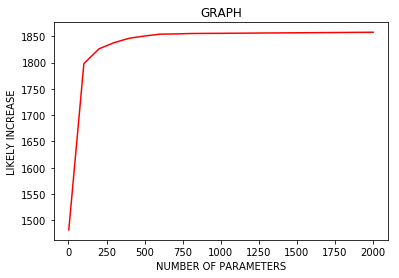

In [100]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(likely_increase_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('LIKELY INCREASE')
plt.title('GRAPH')
plt.show()

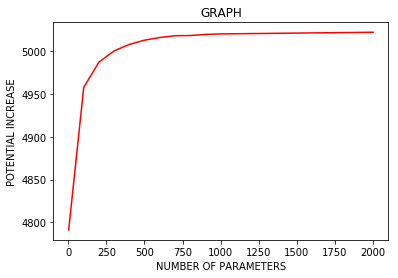

In [101]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(potential_increase_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('POTENTIAL INCREASE')
plt.title('GRAPH')
plt.show()

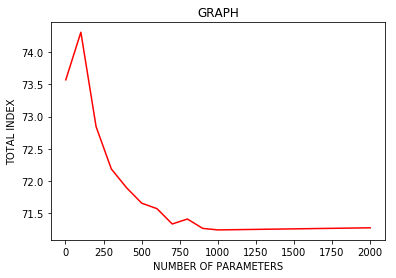

In [102]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(total_index_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('TOTAL INDEX')
plt.title('GRAPH')
plt.show()

## CONCLUSION : ????

# <center >XGB REGRESSOR </center> #

In [43]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_3(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_xgb_regressor=[]
parameter_xgb_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_xgb_regressor.append(i+1)
    xgb_clf_regressor =XGBRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the xgb model
    xgb_clf_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)
    
    #predictor and calcul rms
    prediction_=xgb_clf_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_xgb_regressor.append(rmse)
timer(start_time)

print(rmse)

/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:55:49] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Time taken: 0 hours 1 minutes and 20.57 seconds.
0.017484467074358422


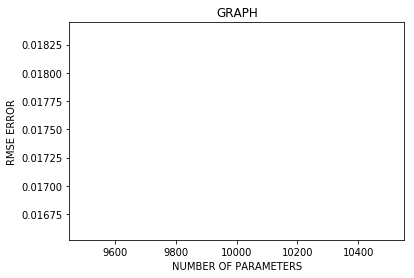

MIN ERROR RMSE== 0.017484467074358422     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [44]:
#BUILD THE GRAPH
X=np.array(parameter_xgb_regressor)
Y=np.array(accuracy_xgb_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [ ]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_1(train_data)
test_data_preprocessing=Feature_Engineering_version_1(test_data)

#build the model
xgb_clf_regressor =XGBRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)

#fit the model
xgb_clf_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)


prediction_test=xgb_clf_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,10)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_7(test_data,10)
op_pred=repartition_energy_strategy_8(test_data,10)

prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #prediction_liste.append([test_data["y"][i],test_data["allocation energy"][i]])
    #print([prediction_test[i],op_pred[i]])
    #print(prediction_liste[i])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("----------------------------------------------------------------------------------------------------------")
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
save_liste(prediction_liste,"prediction_")

## PREDICTION XGB

In [ ]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_1(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

start_time = timer(None)
xgb_clf_regressor =XGBRegressor(n_estimators=100001, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
#training the xgb model
xgb_clf_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)
    
#predictor and calcul rms
prediction_=xgb_clf_regressor.predict(DATA_node_test_preprocessing)
rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
timer(start_time)

print(rmse)

## CONCLUSION: ?????

## <center> RANDOM FOREST REGRESSOR</center> ##

In [77]:
#load datalassifier 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_random_forest_regressor=[]
parameter_random_forest_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_random_forest_regressor.append(i+1)
    rfc_regressor = RandomForestRegressor(n_estimators=i+1, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the random forest model
    rfc_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)    
    #predictor and calcul rms
    prediction_=rfc_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_random_forest_regressor.append(rmse)
timer(start_time)


Time taken: 0 hours 3 minutes and 5.27 seconds.


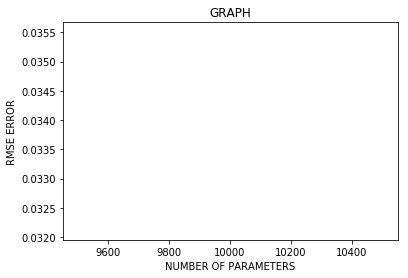

MIN ERROR== 0.033811460140115546      and n_estimators== 10001


In [78]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_regressor)
Y=np.array(accuracy_random_forest_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR==",min_rmse,"     and n_estimators==",estimator)

## CONCLUSION: ?????

In [ ]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
test_data_preprocessing=Feature_Engineering(test_data)

prediction_test=xgb_clf_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,11)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
op_pred=repartition_energy_strategy_6(test_data,10)
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    #print(prediction_liste[i])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"mamedou_random_forest_regressor_regressor")

 ## LIKELY IN HERE WE TRY TO BUILD THE GRAPHE OF LIKELY INCREASE IN FACT PARAMETOR OF MODEL USING RANDOM FOREST REGRESSOR

In [200]:
#load data 
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering(train_data)
test_data_preprocessing=Feature_Engineering(test_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
likely_increase_random_forest_Regressor=[]
parameter_random_forest_Regressor=[]
potential_increase_random_forest_Regressor=[]
total_index_random_forest_Regressor=[]

start_time = timer(None)
for i in [1,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
    parameter_random_forest_Regressor.append(i+1)
    rfc_regressor = RandomForestRegressor(n_estimators=i+1, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the bagging model
    rfc_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)

    #compute the test
    prediction_test=rfc_regressor.predict(test_data_preprocessing)
    test_data["y"]=prediction_test    
    op_pred=repartition_energy_strategy_5(test_data,10)
    prediction_liste=[]
    for i in range(prediction_test.shape[0]):
        prediction_liste.append([prediction_test[i],op_pred[i]])
    
    #statistique predictor
    Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
    likely_increase_random_forest_Regressor.append(Potential_for_increase_in_the_Index)
    potential_increase_random_forest_Regressor.append(Likely_increase_in_the_Index)
    total_index_random_forest_Regressor.append(total_index)
    
timer(start_time)

In [ ]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_Regressor)
Y=np.array(likely_increase_random_forest_Regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('LIKELY INCREASE')
plt.title('GRAPH')
plt.show()

In [ ]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_Regressor)
Y=np.array(potential_increase_random_forest_Regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('POTENTIAL INCREASE')
plt.title('GRAPH')
plt.show()

In [ ]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_Regressor)
Y=np.array(total_index_random_forest_Regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('TOTAL INDEX')
plt.title('GRAPH')
plt.show()

# <center> BROUILLON </center> #

## <center> ENERGY OPTIMISATIPON TEST </center>##

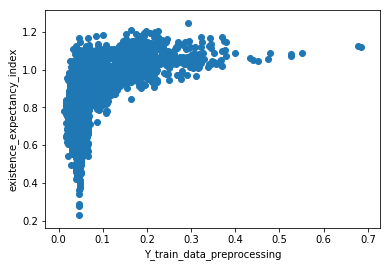

In [212]:
plt.scatter(Y_train_data_preprocessing,existence_expectancy_index)  # on utilise la fonction sinus de Numpy
plt.xlabel('Y_train_data_preprocessing')
plt.ylabel("existence_expectancy_index")
plt.show()

In [44]:
#potential augmentation
Potential_for_increase_in_the_Index=-np.log(Y_train_data_preprocessing+0.01)+3
Likely_ncrease_n_he_ndex=(Potential_for_increase_in_the_Index**2)/1000

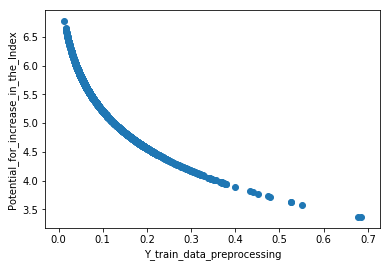

In [45]:
plt.scatter(Y_train_data_preprocessing,Potential_for_increase_in_the_Index)  # on utilise la fonction sinus de Numpy
plt.xlabel('Y_train_data_preprocessing')
plt.ylabel("Potential_for_increase_in_the_Index")
plt.show()

## Testing Gradient Boosting for Cross Validation

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


bagging_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)

error=cross_val_score(bagging_regressor, DATA_node_train_preprocessing, Y_node_train_preprocessing, cv=10, scoring=make_scorer(mean_squared_error))


print(sqrt(error.mean()))


0.020825603124674685


In [93]:
for i in range(10):
    print(sqrt(error[i]))

0.019806135938287665
0.01646129422350988
0.02266241018910091
0.01989692693434228
0.029805167602745455
0.019672626756361597
0.017145529833998856
0.020367315429617103
0.020608386071298442
0.018853782719960417


In [95]:
#prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)

# <center> Using the model without preprocessing </center> #

In [53]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
#del train_data["y"]

#test submission
test_data=pd.read_csv("DATA/test.csv")

train_data_preprocessing,Y_train_data_preprocessing =train_data[test_data.columns[2:]].fillna(0), train_data['y'].fillna(0)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)

# Create our model
model = GradientBoostingRegressor(n_estimators=10000, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)


# Split the data into inputs (X) and desired output (y)
#X, y = train_data[test_data.columns[2:]].fillna(0), train_data['y'].fillna(0)

# Fit the model
model.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)

# Score the model
print(sqrt(mean_squared_error(Y_node_test_preprocessing, model.predict(DATA_node_test_preprocessing)))) 

0.029737082437688245


In [444]:
#print(test_data.columns[2:])

## TEST BRIOULLON

In [247]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#test submission
test_data=pd.read_csv("DATA/test.csv")

train_data_preprocessing=Feature_Engineering_version_1(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)

# Create our model
model = GradientBoostingRegressor(n_estimators=100001, learning_rate= 0.29, max_depth=3,min_samples_split=3, min_samples_leaf=1)

# Fit the model
model.fit(train_data_preprocessing, Y_train_data_preprocessing)

# Score the model
print(sqrt(mean_squared_error(Y_node_test_preprocessing, model.predict(DATA_node_test_preprocessing)))) 

#/*****************************************************************************************************************/
#predictionafter training
#test_data_preprocessing=test_data.fillna(0)
#last_prediction=pd.read_csv("prediction_sawadogo2_0.07308613.csv")
#test_data_preprocessing["y"]=last_prediction["pred"]
test_data_preprocessing=Feature_Engineering_version_1(test_data)
prediction_test=model.predict(test_data_preprocessing)
test_data["yy"]=prediction_test

op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
prediction_liste=[]
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
save_liste(prediction_liste,"mamedou_test123")

0.000319152407124116


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.89988
percentage_inf_0_7== 0.1
POTENTIAL FOR INCREASE ON THE INDEX  =  5009.622923274585
LIKELY INCREASE IN THE INDEX         =  1858.4663077058772
TOTAL INDEX                          =  73.25218632931372


In [ ]:
0.007666798077438549
0.007357061463387327
0.007187262413598003

# without preprocessing

In [93]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
#del train_data["y"]

#test submission
test_data=pd.read_csv("DATA/test.csv")

train_data_preprocessing,Y_train_data_preprocessing =train_data[test_data.columns[2:]].fillna(train_data.median()), train_data['y'].fillna(train_data.median())

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)

# Create our model
# most the learning rate is big, most the result is better()
model =XGBRegressor(n_estimators=200, learning_rate= 0.21, max_depth=3,min_samples_split=3, min_samples_leaf=1)

# Split the data into inputs (X) and desired output (y)
#X, y = train_data[test_data.columns[2:]].fillna(0), train_data['y'].fillna(0)

# Fit the model
model.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)

# Score the model
print(sqrt(mean_squared_error(Y_node_test_preprocessing, model.predict(DATA_node_test_preprocessing)))) 

/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:47:37] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.027047484211667094


In [60]:
#0.21#100=0.027218440439518196
#0.21#200=0.027047484211667094
